In [1]:
# 主成分分析(Principal Component Analysis)，他是一種非監督式(unsupervised)降維(Dimension reduction)的演算法

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

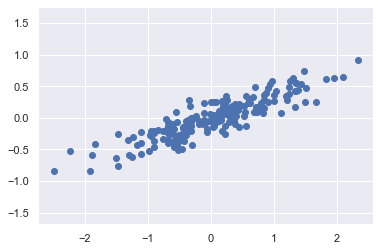

In [87]:
# 以亂數產生200個點，並呈現在二維平面中
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

In [88]:
# 根據上圖輸出結果，可以看到，這200個亂數產生的點，在X軸、Y軸平面上呈現線性關係
# 而在主成分分析非監督式學習問題中，他是以學習X軸與Y軸的關係，並量化其關係；並非是由X軸的資料預測Y軸的資料。

In [89]:
# n_components：要保留成分的數量
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [90]:
pca.explained_variance_

array([0.7625315, 0.0184779])

In [91]:
# 再來，定義draw_vector函數，我們要來預測資料的向量方向及平方長度
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='k')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

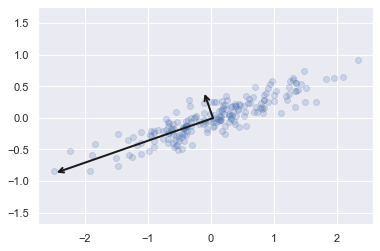

In [92]:
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')
# 新的 x, y 軸

In [100]:
# 要如何將資料數據降維呢? 就是需要將一組或多組資料的主成分(principal components)歸零
pca = PCA(0.95)
pca.fit(X)
# 將原始資料降維 2 -> 1
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


(-2.731158226766438,
 2.6099018832593326,
 -0.9672765706389318,
 1.006064230853995)

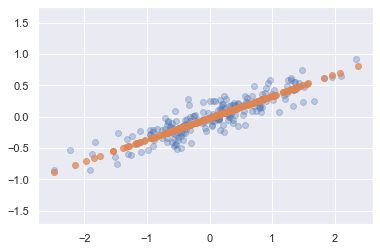

In [101]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.7)
plt.axis('equal')

In [102]:
pca.explained_variance_ratio_

array([0.97634101])